# Regression using Keras

In this task we will design and train a regression model and explore the comfort of working with the high-level API of thee Keras library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# set the path to the data
csv_path = r"/Users/murilo/Downloads/Tutorials-20231205/Tutorial 1/winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shaffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

Below is a simple network implemented using Keras. In addition to the network we define the loss function and optimiser. We can use the Sequential class to very easiliy build a simple architecture. For more information on Keras, see: https://keras.io/api/models/sequential/ and https://keras.io/api/layers/core_layers/dense/

In [93]:
model = Sequential()
# 11 inputs, 20 outputs, relu
model.add(Dense(40, input_dim=11, activation='relu')) 
model.add(Dense(40, activation='relu')) 
model.add(Dense(40, activation='relu')) 
# 20 inputs (automatically detected by Keras), 1 output, linear activation
model.add(Dense(1, activation='linear'))


# Adam:
opt = keras.optimizers.legacy.Adam(learning_rate=0.0001) 

# Set loss function and optimiser algorithm
model.compile(loss='mse',  # mean squared error
              optimizer = opt
              # optimizer='sgd'# stochastic gradient descent
             ) 

### Model training and evaluation

The code below trains the network for 5 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

In [94]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=16)

Epoch 1/50
188/188 [==============================] - 0s 838us/step - loss: 81.3217 - val_loss: 4.7536
Epoch 2/50
188/188 [==============================] - 0s 626us/step - loss: 4.2469 - val_loss: 3.4094
Epoch 3/50
188/188 [==============================] - 0s 615us/step - loss: 3.0146 - val_loss: 2.3152
Epoch 4/50
188/188 [==============================] - 0s 612us/step - loss: 1.6942 - val_loss: 1.3071
Epoch 5/50
188/188 [==============================] - 0s 623us/step - loss: 1.1374 - val_loss: 0.9660
Epoch 6/50
188/188 [==============================] - 0s 620us/step - loss: 0.9120 - val_loss: 0.8520
Epoch 7/50
188/188 [==============================] - 0s 610us/step - loss: 0.8241 - val_loss: 0.8069
Epoch 8/50
188/188 [==============================] - 0s 642us/step - loss: 0.7960 - val_loss: 0.7952
Epoch 9/50
188/188 [==============================] - 0s 623us/step - loss: 0.7719 - val_loss: 0.7791
Epoch 10/50
188/188 [==============================] - 0s 602us/step - loss: 0.77

The history object returned by the model training above contains the values of the loss function (the mean-squared-error) at different epochs. We discard the first epoch as the loss value is very high, obscuring the rest of the distribution

In [95]:
train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

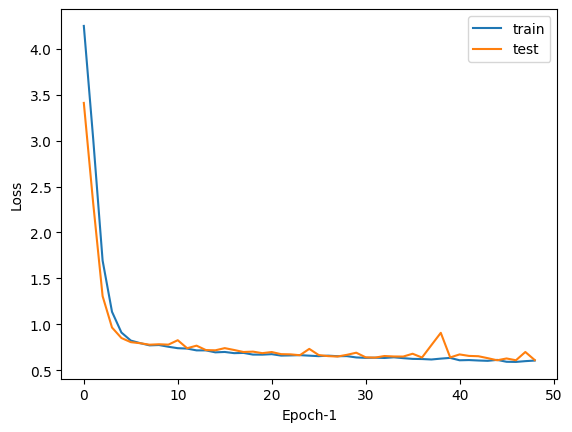

In [96]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epoch-1")
plt.ylabel("Loss")
plt.show()

60/60 [==============================] - 0s 373us/step
Correlation coefficient: 0.5002895231655771


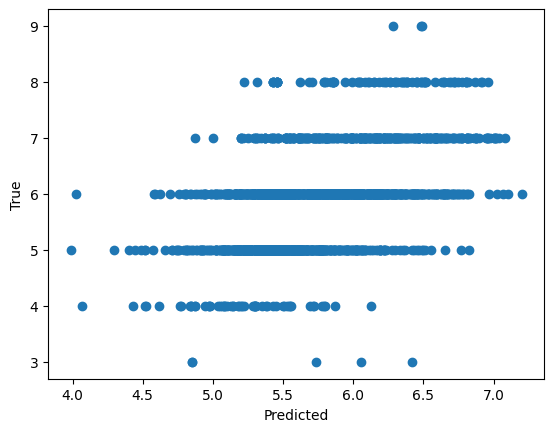

In [97]:
# After the training:

# Prepare scatter plot
y_pred = model.predict(X_test)[:,0]

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [82]:
np.corrcoef(y_pred,y_test)

array([[1.        , 0.41971893],
       [0.41971893, 1.        ]])

### Tasks

- Use the notebook as starting point. It already contains a simple network implemented in Keras

- Currently, SGD is used without momentum. Try training the same network with a momentum term. Replace SGD with the Adam optimizer and train using that. (See: https://keras.io/api/optimizers/)

- Add two more hidden layers to the network (you can choose the number of nodes but make sure to apply the ReLu activation function after each) and train again

- Test differet numbers of examples (i.e. change the size of the minibatch) to be simulataneously used by the network